# Exploring and Transforming JSON Schemas - Lab

# Introduction

In this lab, you'll practice exploring a JSON file whose structure and schema is unknown to you. We will provide you with limited information, and you will explore the dataset to answer the specified question.

## Objectives

You will be able to:

* Use the `json` module to load and parse JSON documents
* Explore and extract data using unknown JSON schemas
* Convert JSON to a pandas dataframe

## Your Task: Create a Bar Graph of the Top 10 States with the Highest Asthma Rates for Adults Age 18+

The information you need to create this graph is located in `disease_data.json`. It contains both data and metadata.

You are given the following codebook/data dictionary:

* The actual data values are associated with the key `'DataValue'`
* The state names are associated with the key `'LocationDesc'`
* To filter to the appropriate records, make sure:
  * The `'Question'` is `'Current asthma prevalence among adults aged >= 18 years'`
  * The `'StratificationCategoryID1'` is `'OVERALL'`
  * The `'DataValueTypeID'` is `'CRDPREV'`
  * The `'LocationDesc'` is not `'United States'`
  
The provided JSON file contains both data and metadata, and you will need to parse the metadata in order to understand the meanings of the values in the data.

No further information about the structure of this file is provided.

## Load the JSON File

Load the data from the file `disease_data.json` into a variable `data`.

In [6]:
# Your code here 
import json

# Open and load the JSON file
with open('disease_data.json', 'r') as f:
    data = json.load(f)

# Print to verify the data has been loaded
print(type(data))  # Should print <class 'dict'> or <class 'list'> depending on the structure

<class 'dict'>


## Explore the Overall Structure

What is the overall data type of `data`?

In [7]:
# Your code here
print(type(data))

<class 'dict'>


What are the keys?

In [8]:
# Your code here
# Display the keys in the dictionary
print(data.keys())

dict_keys(['meta', 'data'])


What are the data types associates with those keys?

In [9]:
# Your code here (data)
# Display the keys and their associated data types
for key, value in data.items():
    print(f"Key: {key}, Data Type: {type(value)}")

Key: meta, Data Type: <class 'dict'>
Key: data, Data Type: <class 'list'>


In [10]:
# Your code here (metadata)
# Check the data type of the 'metadata' key
metadata_value = data['meta']
print(f"Data type of 'meta': {type(metadata_value)}")

# Optionally, display the contents of 'metadata'
print("Contents of 'metadata':", metadata_value)

Data type of 'meta': <class 'dict'>
Contents of 'metadata': {'view': {'id': 'g4ie-h725', 'name': 'U.S. Chronic Disease Indicators (CDI)', 'attribution': 'Centers for Disease Control and Prevention, National Center for Chronic Disease Prevention and Health Promotion, Division of Population Health', 'attributionLink': 'http://www.cdc.gov/nccdphp/dph/', 'averageRating': 0, 'category': 'Chronic Disease Indicators', 'createdAt': 1463517008, 'description': "CDC's Division of Population Health provides cross-cutting set of 124 indicators that were developed by consensus and that allows states and territories and large metropolitan areas to uniformly define, collect, and report chronic disease data that are important to public health practice and available for states, territories and large metropolitan areas. In addition to providing access to state-specific indicator data, the CDI web site serves as a gateway to additional information and data resources.", 'displayType': 'table', 'downloadCou

Perform additional exploration to understand the contents of these values. For dictionaries, what are their keys? For lists, what is the length, and what does the first element look like?

In [11]:
# Your code here (add additional cells as needed)
# Explore the contents of each key in the data dictionary
for key, value in data.items():
    print(f"Key: {key}, Data Type: {type(value)}")
    
    if isinstance(value, dict):
        # If the value is a dictionary, display its keys
        print(f"Keys in the '{key}' dictionary: {value.keys()}")
    elif isinstance(value, list):
        # If the value is a list, display its length and the first element
        print(f"Length of the list in '{key}': {len(value)}")
        if len(value) > 0:
            print(f"First element in the list of '{key}': {value[0]}")
    else:
        # For other data types, just print the value
        print(f"Value of '{key}': {value}")
    
    print("-" * 40)  # Separator for clarity

Key: meta, Data Type: <class 'dict'>
Keys in the 'meta' dictionary: dict_keys(['view'])
----------------------------------------
Key: data, Data Type: <class 'list'>
Length of the list in 'data': 60266
First element in the list of 'data': [1, 'FF49C41F-CE8D-46C4-9164-653B1227CF6F', 1, 1527194521, '959778', 1527194521, '959778', None, '2016', '2016', 'US', 'United States', 'BRFSS', 'Alcohol', 'Binge drinking prevalence among adults aged >= 18 years', None, '%', 'Crude Prevalence', '16.9', '16.9', '*', '50 States + DC: US Median', '16', '18', 'Overall', 'Overall', None, None, None, None, [None, None, None, None, None], None, '59', 'ALC', 'ALC2_2', 'CRDPREV', 'OVERALL', 'OVR', None, None, None, None]
----------------------------------------


As you likely identified, we have a list of lists forming the `'data'`. In order to make sense of that list of lists, we need to find the meaning of each index, i.e. the names of the columns.

## Identify the Column Names

Look through the metadata to find the *names* of the columns, and assign that variable to `column_names`. This should be a list of strings. (If you just get the values associated with the `'columns'` key, you will have a list of dictionaries, not a list of strings.)

In [12]:
# Your code here (add additional cells as needed)
# Access the metadata section in the data
metadata = data['meta']  

# Extract the 'columns' key from metadata
columns = metadata['view']['columns']  # Adjust path to the columns key

# Create a list of strings containing the column names
column_names = [column['name'] for column in columns]
# Print to verify
print("Column Names:", column_names)

Column Names: ['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at', 'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']


The following code checks that you have the correct column names:

In [13]:
# Run this cell without changes

# 42 total columns
assert len(column_names) == 42

# Each name should be a string, not a dict
assert type(column_names[0]) == str and type(column_names[-1]) == str

# Check that we have some specific strings
assert "DataValue" in column_names
assert "LocationDesc" in column_names
assert "Question" in column_names
assert "StratificationCategoryID1" in column_names
assert "DataValueTypeID" in column_names

## Filter Rows Based on Columns

Recall that we only want to include records where:

* The `'Question'` is `'Current asthma prevalence among adults aged >= 18 years'`
* The `'StratificationCategoryID1'` is `'OVERALL'`
* The `'DataValueTypeID'` is `'CRDPREV'`
* The `'LocationDesc'` is not `'United States'`

Combining knowledge of the data and metadata, filter out the rows of data that are not relevant.

(You may find the `pandas` library useful here.)

In [14]:
# Your code here (add additional cells as needed)
import pandas as pd

# Assume 'data' is the list of lists containing your data
# Create a DataFrame using the data and column names
df = pd.DataFrame(data['data'], columns=column_names)

# Apply the filtering conditions:
filtered_df = df[
    (df['Question'] == 'Current asthma prevalence among adults aged >= 18 years') &
    (df['StratificationCategoryID1'] == 'OVERALL') &
    (df['DataValueTypeID'] == 'CRDPREV') &
    (df['LocationDesc'] != 'United States')
]

# Display the filtered DataFrame
print(filtered_df)

       sid                                    id  position  created_at  \
9371  9369  6BEC61D0-E04B-44BA-8170-F7D6A4C40A09      9369  1527194523   
9372  9370  5D6EDDA9-B241-4498-A262-ED20AB78C44C      9370  1527194523   
9373  9371  5FCE0D49-11FD-4545-B9E7-14F503123105      9371  1527194523   
9374  9372  68F151CE-3084-402C-B672-78A43FBDE287      9372  1527194523   
9375  9373  D3F00ED2-A069-4E40-B42B-5A2528A91B6F      9373  1527194523   
9376  9374  A8B4F198-D388-4663-B82B-936C5FB37428      9374  1527194523   
9377  9375  B2FB1AEA-5E2A-4E7C-9A93-586EA18EBE99      9375  1527194523   
9378  9376  7C5D70DE-DE95-4AAD-A666-2260B5A16363      9376  1527194523   
9379  9377  1893C9A3-C6CE-4F47-A66F-85A4F89F244F      9377  1527194523   
9380  9378  D47614E3-47D4-40D6-AC29-C434C876F3DF      9378  1527194523   
9381  9379  B1F090FC-1E46-467C-8C7D-0B90022A36BB      9379  1527194523   
9382  9380  BFF73DC1-4B7B-43AC-9797-5F244999B94A      9380  1527194523   
9383  9381  35433725-2434-480F-8DA5-7D

You should have 54 records after filtering.

## Extract the Attributes Required for Plotting

For each record, the only information we actually need for the graph is the `'DataValue'` and `'LocationDesc'`. Create a list of records that only contains these two attributes.

Also, make sure that the data values are numbers, not strings.

In [15]:
# Your code here (create additional cells as needed)
# Select only the 'DataValue' and 'LocationDesc' columns from the filtered DataFrame
filtered_df = filtered_df[['DataValue', 'LocationDesc']]

# Convert 'DataValue' to numeric (if it's not already numeric)
filtered_df['DataValue'] = pd.to_numeric(filtered_df['DataValue'], errors='coerce')

# Drop any rows where 'DataValue' is NaN (in case there were invalid entries)
filtered_df = filtered_df.dropna(subset=['DataValue'])

# Convert the DataFrame to a list of records (list of dictionaries)
records_for_plotting = filtered_df.to_dict(orient='records')

## Find Top 10 States

Sort by `'DataValue'` and limit to the first 10 records.

In [16]:
# Sort the DataFrame by 'DataValue' in descending order
top_10_states = filtered_df.sort_values(by='DataValue', ascending=False).head(10)

# Print the top 10 records to verify
print(top_10_states)

      DataValue   LocationDesc
9390       12.2          Maine
9402       11.8     New Mexico
9419       11.8  West Virginia
9388       11.6       Kentucky
9400       11.4  New Hampshire
9393       10.9       Michigan
9413       10.9      Tennessee
9382       10.7         Hawaii
9423       10.7    Puerto Rico
9410       10.7   Rhode Island


## Separate the Names and Values for Plotting

Assign the names of the top 10 states to a list-like variable `names`, and the associated values to a list-like variable `values`. Then the plotting code below should work correctly to make the desired bar graph.

Below we display this variable as a table using pandas:

In [17]:
# Extract the 'LocationDesc' (names of the states) and 'DataValue' (values) for the top 10 states
names = top_10_states['LocationDesc'].tolist()
values = top_10_states['DataValue'].tolist()

# Print the names and values to verify
print("Names:", names)
print("Values:", values)
# Replace None with appropriate code
# Extract the 'LocationDesc' (names of the states) and 'DataValue' (values) for the top 10 states
names = top_10_states['LocationDesc'].tolist()
values = top_10_states['DataValue'].tolist()



Names: ['Maine', 'New Mexico', 'West Virginia', 'Kentucky', 'New Hampshire', 'Michigan', 'Tennessee', 'Hawaii', 'Puerto Rico', 'Rhode Island']
Values: [12.2, 11.8, 11.8, 11.6, 11.4, 10.9, 10.9, 10.7, 10.7, 10.7]


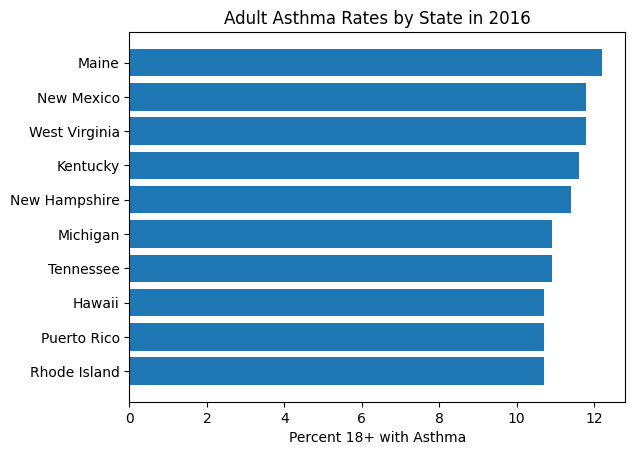

In [19]:
# Run this cell without changes

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.barh(names[::-1], values[::-1]) # Values inverted so highest is at top
ax.set_title('Adult Asthma Rates by State in 2016')
ax.set_xlabel('Percent 18+ with Asthma');

## Summary

In this lab you got some extended practice exploring the structure of JSON files and visualizing data.